# PROYECTO FINAL

## Empezamos importando los paquetes necesarios para leer y anlaizar tablas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
pd.options.display.max_columns = None
pd.options.display.max_rows = 130

### Leemos el archivo "application_train.csv" y lo guardamos con el nombre "df"

In [2]:
df= pd.read_csv("application_train.csv")

### Aqui empezamos con el analisis exploratorio de datos (EDA)

In [4]:
df.isnull().sum().sum()

9152465

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## En las siguientes lineas eliminaré las columnas que tienen mas de 45% de nulos 

In [7]:
nulos45=["OWN_CAR_AGE"
,"APARTMENTS_AVG"
,"BASEMENTAREA_AVG"
,"YEARS_BEGINEXPLUATATION_AVG"
,"YEARS_BUILD_AVG"
,"COMMONAREA_AVG"
,"ELEVATORS_AVG"
,"ENTRANCES_AVG"
,"FLOORSMAX_AVG"
,"FLOORSMIN_AVG"
,"LANDAREA_AVG"
,"LIVINGAPARTMENTS_AVG"
,"LIVINGAREA_AVG"
,"NONLIVINGAPARTMENTS_AVG"
,"NONLIVINGAREA_AVG"
,"APARTMENTS_MODE"
,"BASEMENTAREA_MODE"
,"YEARS_BEGINEXPLUATATION_MODE"
,"YEARS_BUILD_MODE"
,"COMMONAREA_MODE"
,"ELEVATORS_MODE"
,"ENTRANCES_MODE"
,"FLOORSMAX_MODE"
,"FLOORSMIN_MODE"
,"LANDAREA_MODE"
,"LIVINGAPARTMENTS_MODE"
,"LIVINGAREA_MODE"
,"NONLIVINGAPARTMENTS_MODE"
,"NONLIVINGAREA_MODE"
,"BASEMENTAREA_MEDI"
,"YEARS_BEGINEXPLUATATION_MEDI"
,"YEARS_BUILD_MEDI"
,"COMMONAREA_MEDI"
,"ELEVATORS_MEDI"
,"ENTRANCES_MEDI"
,"FLOORSMAX_MEDI"
,"FLOORSMIN_MEDI"
,"LANDAREA_MEDI"
,"LIVINGAPARTMENTS_MEDI"
,"LIVINGAREA_MEDI"
,"NONLIVINGAPARTMENTS_MEDI"
,"NONLIVINGAREA_MEDI"
,"FONDKAPREMONT_MODE"
,"HOUSETYPE_MODE"
,"TOTALAREA_MODE"
,"WALLSMATERIAL_MODE"
,"EMERGENCYSTATE_MODE"
,"APARTMENTS_MEDI"
]

In [8]:
df=df.drop(nulos45, axis=1)

In [9]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

EXT_SOURCE_1                   56.381073
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2 

## Eliminaré las columnas que no se tienen disponibles en el momento de la solicitud o que creo irrelevantes para el modelo

In [10]:
irrelevantes=["NAME_TYPE_SUITE"
,"WEEKDAY_APPR_PROCESS_START"
,"HOUR_APPR_PROCESS_START"
]

In [11]:
df=df.drop(irrelevantes, axis=1)

In [12]:
amtbureau=["AMT_REQ_CREDIT_BUREAU_HOUR"
,"AMT_REQ_CREDIT_BUREAU_DAY"
,"AMT_REQ_CREDIT_BUREAU_WEEK"
,"AMT_REQ_CREDIT_BUREAU_MON"
,"AMT_REQ_CREDIT_BUREAU_QRT"
,"AMT_REQ_CREDIT_BUREAU_YEAR"]

In [13]:
df=df.drop(amtbureau, axis=1)

In [14]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.311267,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,Managers,1.0,3,3,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartmen

## A continuacion voy a empezar la limpieza de datos ("categoricos")

In [15]:
categoricas=["NAME_CONTRACT_TYPE"
,"CODE_GENDER"
,"FLAG_OWN_CAR"
,"FLAG_OWN_REALTY"
,"NAME_INCOME_TYPE"
,"NAME_EDUCATION_TYPE"
,"NAME_FAMILY_STATUS"
,"NAME_HOUSING_TYPE"
,"OCCUPATION_TYPE"
,"ORGANIZATION_TYPE"
]
for cat in categoricas:
    print(f'Columna {cat}: {df[cat].nunique()} subniveeles')

Columna NAME_CONTRACT_TYPE: 2 subniveeles
Columna CODE_GENDER: 3 subniveeles
Columna FLAG_OWN_CAR: 2 subniveeles
Columna FLAG_OWN_REALTY: 2 subniveeles
Columna NAME_INCOME_TYPE: 8 subniveeles
Columna NAME_EDUCATION_TYPE: 5 subniveeles
Columna NAME_FAMILY_STATUS: 6 subniveeles
Columna NAME_HOUSING_TYPE: 6 subniveeles
Columna OCCUPATION_TYPE: 18 subniveeles
Columna ORGANIZATION_TYPE: 58 subniveeles


In [16]:
categoricas=["NAME_CONTRACT_TYPE"
,"CODE_GENDER"
,"FLAG_OWN_CAR"
,"FLAG_OWN_REALTY"
,"NAME_INCOME_TYPE"
,"NAME_EDUCATION_TYPE"
,"NAME_FAMILY_STATUS"
,"NAME_HOUSING_TYPE"
,"OCCUPATION_TYPE"
,"ORGANIZATION_TYPE"
]
for cat in categoricas:
    print(f'Columna {cat}: {df[cat].unique()}')


Columna NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
Columna CODE_GENDER: ['M' 'F' 'XNA']
Columna FLAG_OWN_CAR: ['N' 'Y']
Columna FLAG_OWN_REALTY: ['Y' 'N']
Columna NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Columna NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Columna NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Columna NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Columna OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 '

In [17]:
df["CODE_GENDER"]

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307511, dtype: object

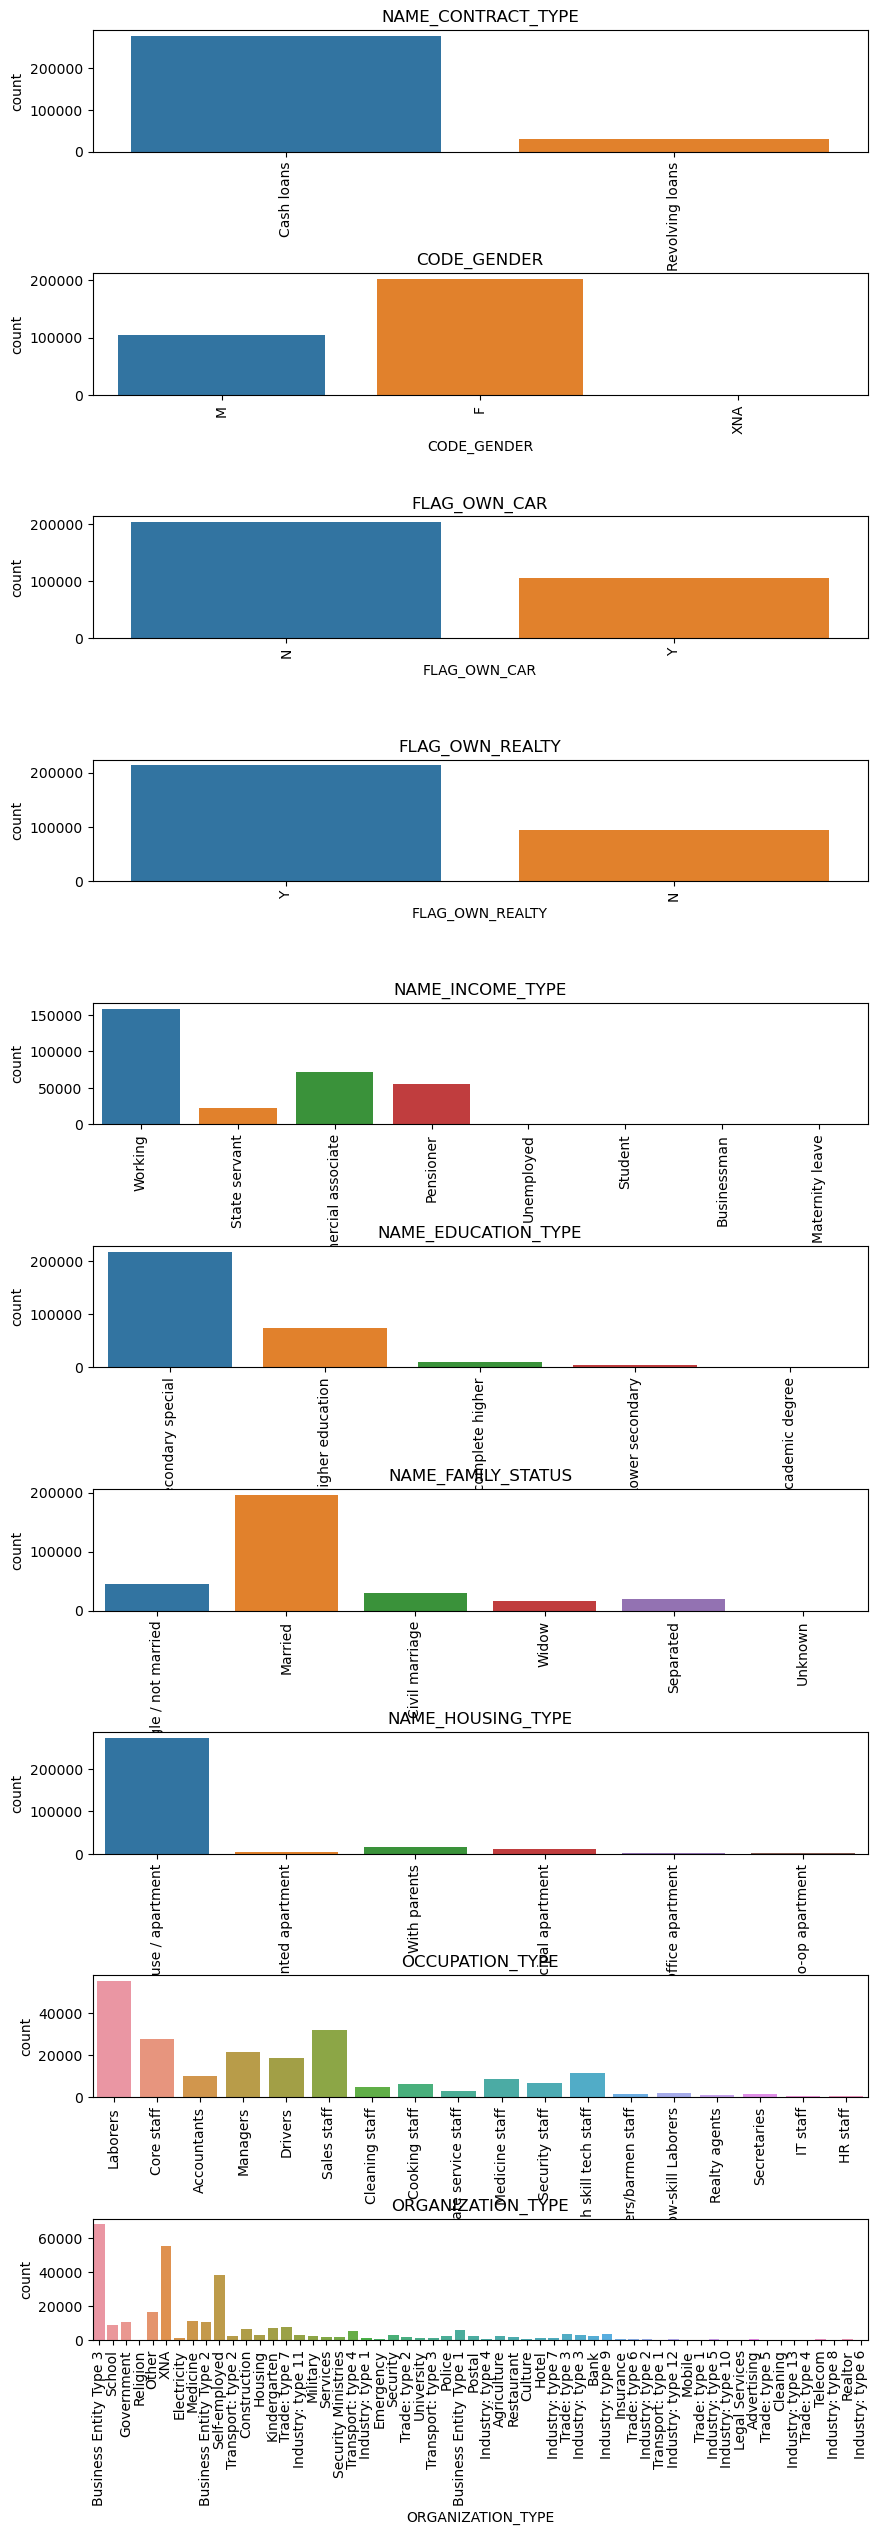

In [18]:
categoricas = ["NAME_CONTRACT_TYPE"
,"CODE_GENDER"
,"FLAG_OWN_CAR"
,"FLAG_OWN_REALTY"
,"NAME_INCOME_TYPE"
,"NAME_EDUCATION_TYPE"
,"NAME_FAMILY_STATUS"
,"NAME_HOUSING_TYPE"
,"OCCUPATION_TYPE"
,"ORGANIZATION_TYPE"
]

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(categoricas):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

In [19]:
print(df["CODE_GENDER"].unique())
(df["CODE_GENDER"]=='XNA').sum()
df= df.drop(df[df["CODE_GENDER"]=='XNA'].index)
print(df["CODE_GENDER"].unique())

['M' 'F' 'XNA']
['M' 'F']


In [20]:
print(df["NAME_INCOME_TYPE"].value_counts())

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


In [21]:
print(df["NAME_INCOME_TYPE"].unique())
df["NAME_INCOME_TYPE"] = df["NAME_INCOME_TYPE"].str.replace('Unemployed','other', regex=False)
df["NAME_INCOME_TYPE"] = df["NAME_INCOME_TYPE"].str.replace('Student','other', regex=False)
df["NAME_INCOME_TYPE"] = df["NAME_INCOME_TYPE"].str.replace('Businessman','other', regex=False)
df["NAME_INCOME_TYPE"] = df["NAME_INCOME_TYPE"].str.replace('Maternity leave','other', regex=False)
print(df["NAME_INCOME_TYPE"].unique())
print(df["NAME_INCOME_TYPE"].value_counts())

['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'other']
Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
other                       55
Name: NAME_INCOME_TYPE, dtype: int64


In [22]:
print(df["NAME_EDUCATION_TYPE"].value_counts())

Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


In [23]:
print(df["NAME_FAMILY_STATUS"].value_counts())
df["NAME_FAMILY_STATUS"] = df["NAME_FAMILY_STATUS"].str.replace('Civil marriage','Married', regex=False)
df["NAME_FAMILY_STATUS"] = df["NAME_FAMILY_STATUS"].str.replace('Separated','Single / not married', regex=False)
df["NAME_FAMILY_STATUS"] = df["NAME_FAMILY_STATUS"].str.replace('Widow','Single / not married', regex=False)
df= df.drop(df[df["NAME_FAMILY_STATUS"]=="Unknown"].index)
print(df["NAME_FAMILY_STATUS"].value_counts())

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
Married                 226203
Single / not married     81302
Name: NAME_FAMILY_STATUS, dtype: int64


In [24]:
print(df["NAME_HOUSING_TYPE"].value_counts())

House / apartment      272864
With parents            14840
Municipal apartment     11181
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


In [25]:
df["OCCUPATION_TYPE"].isnull().sum()

96389

In [26]:
((df["OCCUPATION_TYPE"].value_counts()))#/df.shape[0])*100

Laborers                 55186
Sales staff              32102
Core staff               27569
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2092
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [27]:
print(df["ORGANIZATION_TYPE"].value_counts())

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10552
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

## Al existir mucha cardinalidad en la columnas "OCCUPATION_TYPE"  y "ORGANIZATION_TYPE" las eliminaré del datset

In [28]:
mascardinal=["OCCUPATION_TYPE", "ORGANIZATION_TYPE"]
df=df.drop(mascardinal, axis=1)

In [29]:
#Actualizacion de variable categoricas.
categoricas = ["NAME_CONTRACT_TYPE"
,"CODE_GENDER"
,"FLAG_OWN_CAR"
,"FLAG_OWN_REALTY"
,"NAME_INCOME_TYPE"
,"NAME_EDUCATION_TYPE"
,"NAME_FAMILY_STATUS"
,"NAME_HOUSING_TYPE"
,"REGION_RATING_CLIENT"
,"REGION_RATING_CLIENT_W_CITY"]


## En la siguiente linea reviso si existen nulos en las columnas "categoricas"

In [30]:
df[categoricas].isnull().sum()

NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
dtype: int64

## A partir de esta linea empezare a limpiar los datos de las columnas "ordinales"

In [31]:
ordinales=["FLAG_MOBIL"
,"FLAG_EMP_PHONE"
,"FLAG_WORK_PHONE"
,"FLAG_CONT_MOBILE"
,"FLAG_PHONE"
,"FLAG_EMAIL"
,"REG_REGION_NOT_LIVE_REGION"
,"REG_REGION_NOT_WORK_REGION"
,"LIVE_REGION_NOT_WORK_REGION"
,"REG_CITY_NOT_LIVE_CITY"
,"REG_CITY_NOT_WORK_CITY"
,"LIVE_CITY_NOT_WORK_CITY"
,"FLAG_DOCUMENT_2"
,"FLAG_DOCUMENT_3"
,"FLAG_DOCUMENT_4"
,"FLAG_DOCUMENT_5"
,"FLAG_DOCUMENT_6"
,"FLAG_DOCUMENT_7"
,"FLAG_DOCUMENT_8"
,"FLAG_DOCUMENT_9"
,"FLAG_DOCUMENT_10"
,"FLAG_DOCUMENT_11"
,"FLAG_DOCUMENT_12"
,"FLAG_DOCUMENT_13"
,"FLAG_DOCUMENT_14"
,"FLAG_DOCUMENT_15"
,"FLAG_DOCUMENT_16"
,"FLAG_DOCUMENT_17"
,"FLAG_DOCUMENT_18"
,"FLAG_DOCUMENT_19"
,"FLAG_DOCUMENT_20"
,"FLAG_DOCUMENT_21"
]

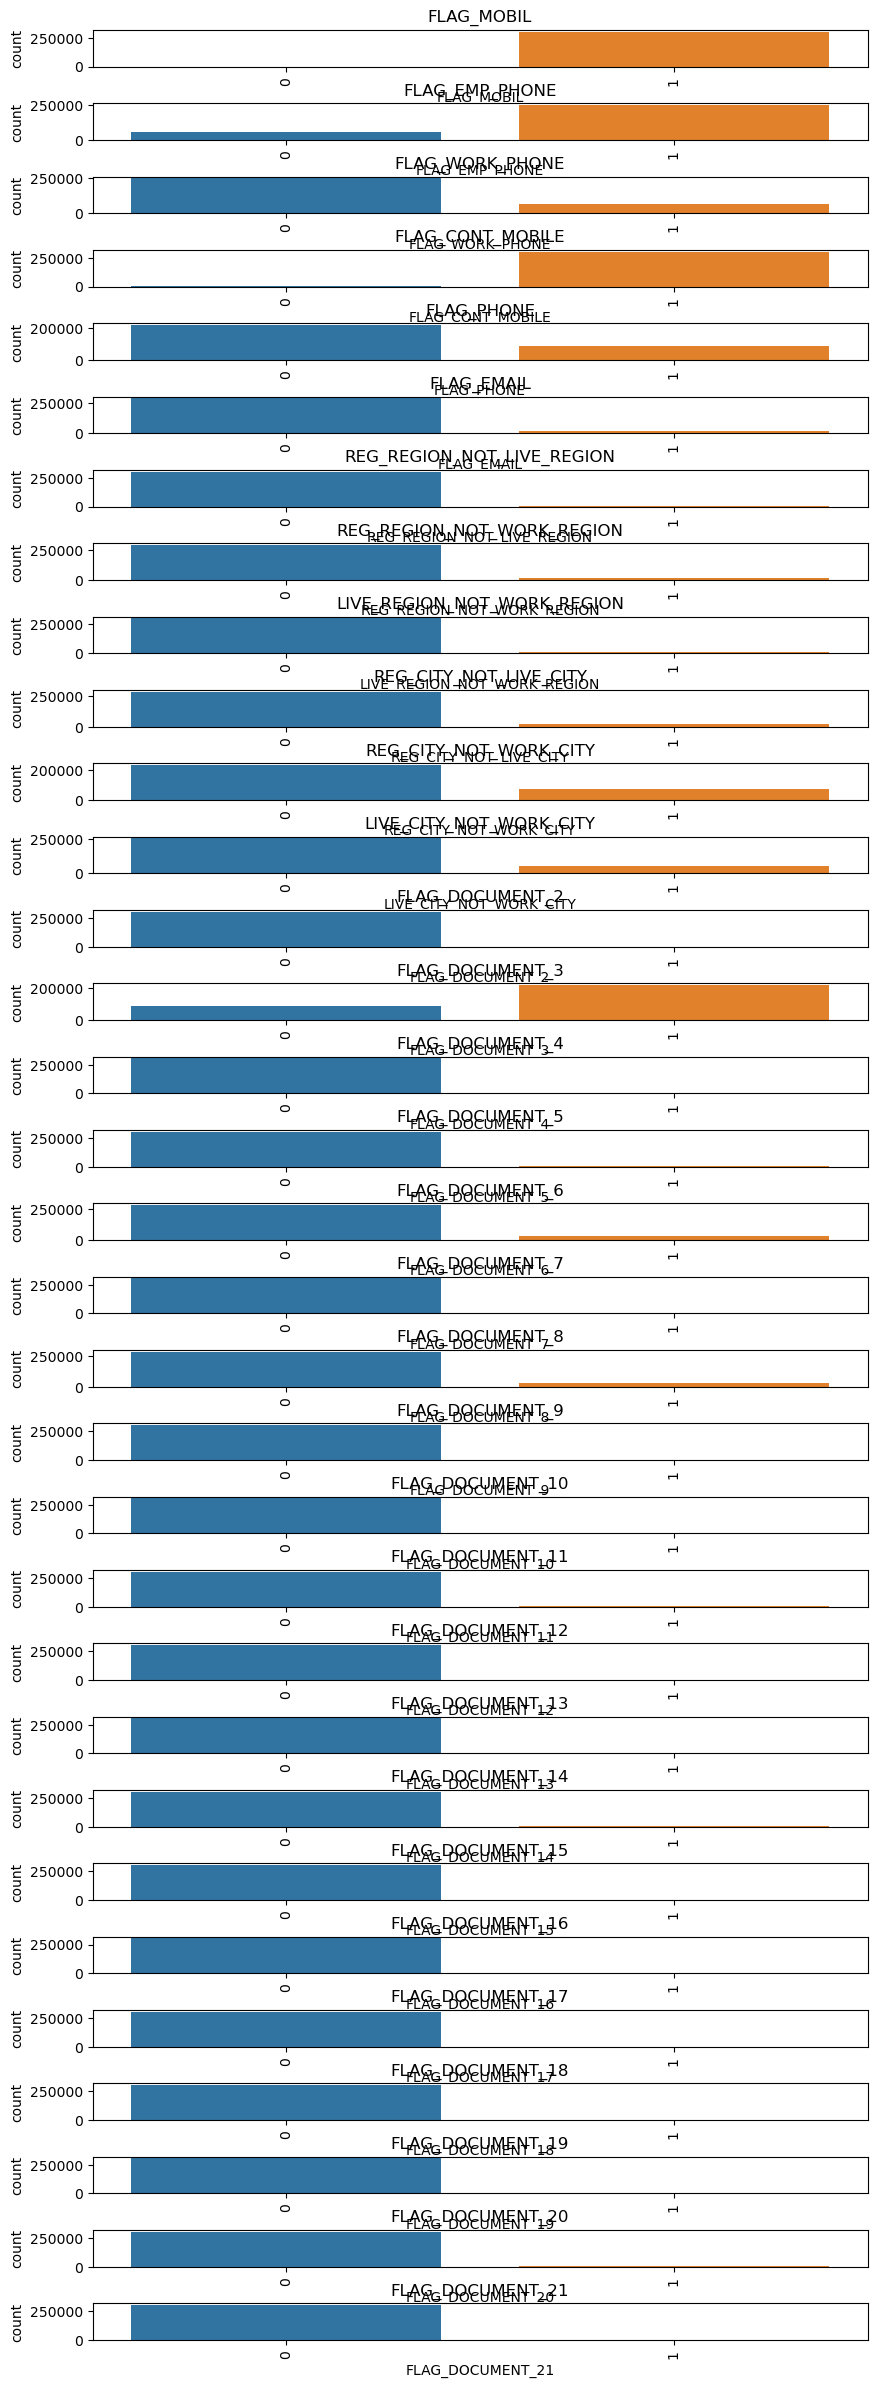

In [32]:
fig, ax = plt.subplots(nrows=32, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(ordinales):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

In [ ]:
   for columna in ordinales:
    conteo_valores = df[columna].value_counts()
    print("Conteo de valores en la columna '{}':".format(columna))
    print(conteo_valores)
    print()

In [ ]:
irrordinales=["FLAG_MOBIL"
,"FLAG_CONT_MOBILE"
,"FLAG_DOCUMENT_2"
,"FLAG_DOCUMENT_4"
,"FLAG_DOCUMENT_7"
,"FLAG_DOCUMENT_9"
,"FLAG_DOCUMENT_10"
,"FLAG_DOCUMENT_11"
,"FLAG_DOCUMENT_12"
,"FLAG_DOCUMENT_13"
,"FLAG_DOCUMENT_14"
,"FLAG_DOCUMENT_15"
,"FLAG_DOCUMENT_17"
,"FLAG_DOCUMENT_19"
,"FLAG_DOCUMENT_20"
,"FLAG_DOCUMENT_21"
]
df=df.drop(irrordinales, axis=1)

In [ ]:
#Actualizacion de variable ordinales
ordinales=["FLAG_EMP_PHONE"
,"FLAG_WORK_PHONE"
,"FLAG_PHONE"
,"FLAG_EMAIL"
,"REG_REGION_NOT_LIVE_REGION"
,"REG_REGION_NOT_WORK_REGION"
,"LIVE_REGION_NOT_WORK_REGION"
,"REG_CITY_NOT_LIVE_CITY"
,"REG_CITY_NOT_WORK_CITY"
,"LIVE_CITY_NOT_WORK_CITY"
,"FLAG_DOCUMENT_3"
,"FLAG_DOCUMENT_5"
,"FLAG_DOCUMENT_6"
,"FLAG_DOCUMENT_8"
,"FLAG_DOCUMENT_16"
,"FLAG_DOCUMENT_18"
]

## A partir de esta linea empezare a limpiar los datos de las columnas "numericas"

In [ ]:
numericas=["CNT_CHILDREN"
,"AMT_INCOME_TOTAL"
,"AMT_CREDIT"
,"AMT_ANNUITY"
,"AMT_GOODS_PRICE"
,"REGION_POPULATION_RELATIVE"
,"DAYS_BIRTH"
,"DAYS_EMPLOYED"
,"DAYS_REGISTRATION"
,"DAYS_ID_PUBLISH"
,"CNT_FAM_MEMBERS"
,"EXT_SOURCE_2"
,"EXT_SOURCE_3"
,"OBS_30_CNT_SOCIAL_CIRCLE"
,"DEF_30_CNT_SOCIAL_CIRCLE"
,"OBS_60_CNT_SOCIAL_CIRCLE"
,"DEF_60_CNT_SOCIAL_CIRCLE"
,"DAYS_LAST_PHONE_CHANGE"
,"EXT_SOURCE_1"
]

In [ ]:
df[numericas].describe()

### En la siguiente linea voy a multiplicar por (-1) las columnas que son negativas 

In [ ]:
fechas=["DAYS_BIRTH"
,"DAYS_EMPLOYED"
,"DAYS_REGISTRATION"
,"DAYS_ID_PUBLISH"
,"DAYS_LAST_PHONE_CHANGE"]

In [ ]:
df[fechas]=df[fechas]*-1

In [ ]:
df[numericas].describe()

In [ ]:
fig, ax = plt.subplots(nrows=19, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=1.5)

for i, col in enumerate(numericas):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

In [ ]:
df1=df[df["DAYS_EMPLOYED"]==-365243]

In [ ]:
df1["TARGET"].value_counts()

In [ ]:
df["DAYS_EMPLOYED"].replace({-365243: np.nan}, inplace = True)

In [ ]:
irrnumerico=["CNT_FAM_MEMBERS"
,"OBS_30_CNT_SOCIAL_CIRCLE"
,"OBS_60_CNT_SOCIAL_CIRCLE"
]
df=df.drop(irrnumerico, axis=1)

In [ ]:
numericas=["CNT_CHILDREN"
,"AMT_INCOME_TOTAL"
,"AMT_CREDIT"
,"AMT_ANNUITY"
,"AMT_GOODS_PRICE"
,"REGION_POPULATION_RELATIVE"
,"DAYS_BIRTH"
,"DAYS_EMPLOYED"
,"DAYS_REGISTRATION"
,"DAYS_ID_PUBLISH"
,"EXT_SOURCE_1"
,"EXT_SOURCE_2"
,"EXT_SOURCE_3"
,"DEF_30_CNT_SOCIAL_CIRCLE"
,"DEF_60_CNT_SOCIAL_CIRCLE"
,"DAYS_LAST_PHONE_CHANGE"
]

In [ ]:
df["CNT_CHILDREN"].value_counts()

In [ ]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

## En las siguientes lineas voy a codificar con one hot encoder de sklearn las columnas categoricas.

In [ ]:
df["REGION_RATING_CLIENT"].unique()

In [ ]:
categoricas

In [ ]:
dfcategoricas=df[categoricas]

In [ ]:

encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(dfcategoricas)
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(input_features=dfcategoricas.columns))
df_encoded

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df=df_encoded.join(df)

In [ ]:
revisar= ["NAME_CONTRACT_TYPE_Cash loans","NAME_CONTRACT_TYPE_Revolving loans","NAME_CONTRACT_TYPE"]
df[revisar].tail(30)



In [ ]:
df.columns

In [ ]:
#Eliminare las columnas categoricas
df=df.drop(categoricas, axis=1)

In [ ]:
df.dtypes

In [ ]:
catencoded=["NAME_CONTRACT_TYPE_Cash loans"                        
,"NAME_CONTRACT_TYPE_Revolving loans"                  
,"CODE_GENDER_F"                                      
,"CODE_GENDER_M"                                        
,"FLAG_OWN_CAR_N"                                    
,"FLAG_OWN_CAR_Y"                                     
,"FLAG_OWN_REALTY_N"                                
,"FLAG_OWN_REALTY_Y"                                    
,"NAME_INCOME_TYPE_Commercial associate"               
,"NAME_INCOME_TYPE_Pensioner"                        
,"NAME_INCOME_TYPE_State servant"                   
,"NAME_INCOME_TYPE_Working"                         
,"NAME_INCOME_TYPE_other"                             
,"NAME_EDUCATION_TYPE_Academic degree"                 
,"NAME_EDUCATION_TYPE_Higher education"              
,"NAME_EDUCATION_TYPE_Incomplete higher"             
,"NAME_EDUCATION_TYPE_Lower secondary"               
,"NAME_EDUCATION_TYPE_Secondary / secondary special"   
,"NAME_FAMILY_STATUS_Married"                           
,"NAME_FAMILY_STATUS_Single / not married"             
,"NAME_HOUSING_TYPE_Co-op apartment"                    
,"NAME_HOUSING_TYPE_House / apartment"                 
,"NAME_HOUSING_TYPE_Municipal apartment"               
,"NAME_HOUSING_TYPE_Office apartment"                   
,"NAME_HOUSING_TYPE_Rented apartment"                  
,"NAME_HOUSING_TYPE_With parents"                       
,"REGION_RATING_CLIENT_1"                               
,"REGION_RATING_CLIENT_2"                            
,"REGION_RATING_CLIENT_3"                               
,"REGION_RATING_CLIENT_W_CITY_1"                       
,"REGION_RATING_CLIENT_W_CITY_2"                       
,"REGION_RATING_CLIENT_W_CITY_3"
,"FLAG_DOCUMENT_3"                                       
,"FLAG_DOCUMENT_5"                                        
,"FLAG_DOCUMENT_6"                                        
,"FLAG_DOCUMENT_8"                                       
,"FLAG_DOCUMENT_16"                                       
,"FLAG_DOCUMENT_18"]                        

In [ ]:
df[catencoded]=df[catencoded].astype(int)

In [ ]:
df.dtypes

In [ ]:
numericas

In [ ]:
imputer = KNNImputer(n_neighbors=3)

df_imputed = pd.DataFrame(imputer.fit_transform(df[numericas]), columns=df[numericas].columns)

print(df_imputed)

## Escalado de columnas numericas

In [ ]:
df_imputed.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_imputed = pd.DataFrame(scaler.fit_transform(df_imputed[numericas]), columns=numericas)

In [ ]:
df_imputed.describe()

### Ahora eliminare las columnas numericas de dataframe original y anexare el df_imputed con el original

In [ ]:
df_imputed

In [ ]:
#Eliminare las columnas NUMERICAS
df=df.drop(numericas, axis=1)

In [ ]:
df=df.join(df_imputed)

In [ ]:
df

In [ ]:
df.to_csv('dfimputed_scaled2.csv', index=False)

# Leemos archivo generado de otro notebook y lo juntamos con 

In [2]:
dfimputed2= pd.read_csv('dfimputed_scaled2.csv')
bureau_agregar= pd.read_csv('bureau_scaled1906.csv')

In [3]:
dfimputed3 = pd.merge(dfimputed2, bureau_agregar, on='SK_ID_CURR', how='left')

In [4]:
dfimputed3=dfimputed3.fillna(0)

In [5]:
dfimputed3.isnull().sum()

NAME_CONTRACT_TYPE_Cash loans                        0
NAME_CONTRACT_TYPE_Revolving loans                   0
CODE_GENDER_F                                        0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_N                                       0
FLAG_OWN_CAR_Y                                       0
FLAG_OWN_REALTY_N                                    0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Working                             0
NAME_INCOME_TYPE_other                               0
NAME_EDUCATION_TYPE_Academic degree                  0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCATION_TYPE_Incomplete higher                0
NAME_EDUCATION_TYPE_Lower secondary                  0
NAME_EDUCATION_TYPE_Secondary / secondary special    0
NAME_FAMIL

In [6]:
dfimputed3=dfimputed3.drop('SK_ID_CURR', axis=1)

In [7]:
dfimputed3

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_other,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,TARGET,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,STATUS,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,AMT_ANNUITY_y
0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.577536,0.142134,-0.478097,-0.166147,-0.506650,-0.149442,-1.506892,-0.838920,-0.379845,-0.579151,-2.447357,-1.316868,-2.028484,4.161937,5.251931,0.206985,1.675246,-0.115117,-0.011964,-0.057280
1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.577536,0.426794,1.725431,0.592667,1.600785,-1.252735,0.166809,-0.600333,-1.078704,-1.790849,-1.189802,0.564958,0.259188,-0.321272,-0.276312,-0.163112,-0.779380,-0.390405,-0.011964,-0.057280
2,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.577536,-0.427188,-1.152885,-1.404653,-1.091372,-0.783438,0.689497,-1.017319,-0.206123,-0.306867,0.147888,0.217534,1.198190,-0.321272,-0.276312,-0.178835,-0.779380,-0.390405,-0.011964,-0.057280
3,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.577536,-0.142527,-0.711430,0.177865,-0.652831,-0.928977,0.680102,0.201165,1.375820,-0.369141,0.095381,0.712635,0.735166,-0.321272,-0.276312,-0.418309,0.000000,0.000000,0.000000,0.000000
4,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,-0.577536,-0.199459,-0.213739,-0.361750,-0.068109,0.563577,0.892522,0.200732,-0.191646,0.307263,-0.209125,-1.003718,1.109849,-0.321272,-0.276312,0.173120,-0.779380,-0.390405,-0.011964,-0.057280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.577536,-0.047640,-0.855489,0.031008,-0.847738,0.845401,-1.537598,-1.012556,0.984947,-0.670575,-2.102796,0.875996,-0.786600,-0.321272,-0.276312,-0.834365,0.000000,0.000000,0.000000,0.000000
307501,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.577536,-0.408210,-0.818594,-1.042323,-0.847738,0.310601,1.085695,0.675598,-0.169789,0.725958,1.306992,-2.086555,0.110718,-0.321272,-0.276312,-1.164549,0.000000,0.000000,0.000000,0.000000
307502,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0

In [8]:
dfimputed3.to_csv('dfimputed_scaled_19062023.csv', index=False)

# AQUI SE ACABA